0328, 0402, 0404
- ***이진 분류***
- **다중 분류**
- **다중 레이블 분류**
- **다중 출력 분류**

## MNIST 데이터셋 불러오기


- fetch_*: 실전 데이터셋을 다운로드 하기 위한 함수
- load_*: 소규모 데이터셋을 로드하기 위한 함수
- make_*: 테스트에 유용한 가짜 데이터셋을 생성하기 위한 함수 (초승달 모양, 복잡한 데이터셋을 만드는데 사용할 수 있다)

사이킷런에서 읽어들인 데이터셋의 딕셔너리 구조

- DESCR: 데이터셋 설명
- data: 2D 넘파이 배열 (입력 데이터)
- target: 1D 넘파이 배열 (레이블)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
## MNIST 데이터셋은 이미지 데이터형
## as_frame=False 하여 넘파이배열로 데이터를 받아 데이터프레임에 맞추도록

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X,y = mnist.data, mnist.target
X # 0이 흰색 -> 이미지 보여줌

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

## MNIST
데이터셋에서 이미지 하나를 확인
1. 784 픽셀값 데이터를 reshape을 하여 2D로 돌린다.
2. axis off 하면 그릴 수 있을거다
3. some_digit으로, 0번째 위치한 첫번째 샘플을 가져온다.

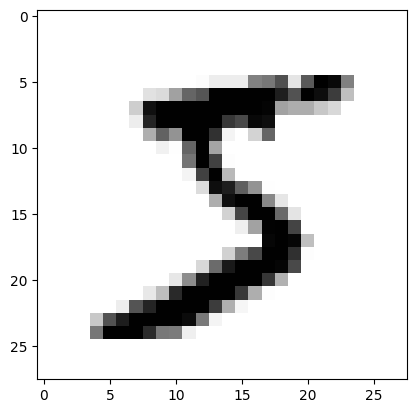

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image,cmap='binary') # 데이터셋에서 이미지 확인
  plt.axis

# 흑백 컬러 맵 사용
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

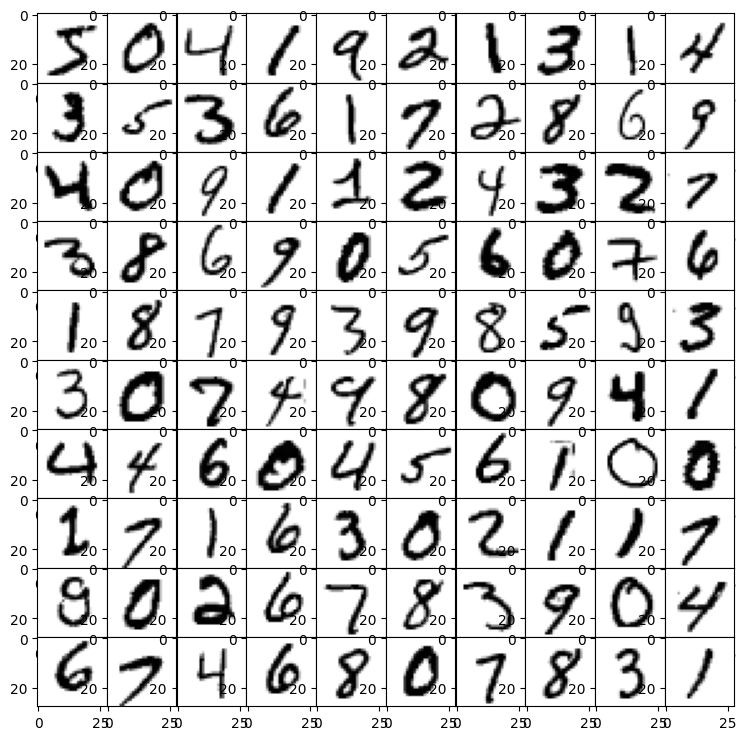

In [ ]:
# MNIST 이미지 샘플
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))

for idx, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, idx + 1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

fetch_openml() 분리
- 6만개를 train, 뒤에 만개를 test으로.
- 이미 1, 2, 3, 4, 등 숫자가 섞여있는 데이터셋이기 때문에 이미 잘 섞여 있어서 교차 검증 폴드를 비슷하게 만든다는게 그 소리
- 1, 1, 1.. 이렇게 나오면 좋지 않음. 어떤 폴드에서는 7을 못보고 이렇게 학습이 될 수 있어서.
- 각 폴드별로 숫자가 누락되지 않도록 학습

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 이진분류기

타깃 벡터를 새로 생성

- 원래 값이 5와 같은가, 5인 경우에만 true 아니면 false
- 즉 true and false 값만 가지는 binary 문제로 변환


In [ ]:
# 5 감지기
y_train_5 = (y_train == '5') # 5 TRUE고 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [ ]:
# SGDClassifier 모델 - 확률적 경사하강법
from sklearn.linear_model import SGDClassifier # 확률적 경사하강법

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

- 모델에 넣을때는 한줄 벡터(784)로 들어간다
- 가중치를 학습해서 숫자가 위치한 패턴을 학습해서 5가 보통 픽셀 큰 곳에 위치하더라 이런식으로..
- 그래서 5를 분류하는 방법

In [ ]:
# 숫자 5 이미지 감지
sgd_clf.predict([some_digit])

array([ True])

## 성능측정

### 교차검증을 사용한 정확도 측정

In [ ]:
# cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# 모든 이미지를 가장 많이 등장하는 클래스로 분류하는 더미 분류기 만들어 비교
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# False 출력, True로 예측된 것 없음
print(any(dummy_clf.predict(X_train)))

False


- 가장 학습 데이터셋에 많이 차지하는 레이블로 예측해버리는 것
- 패턴 전혀 고려하지 않고 레이블의 개수를 비교해 5가 아닌게 훨씬 많으니까 5가아니다!! 예측하는 것

In [ ]:
# 모델 정확도 확인
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
# 교차검증
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # 데이터셋이 미리 섞여 있지 않다면 suffle=true 추가
## cv의 값을 앞서 3으로 정했기 때문에 splits 도 3 적용

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]

  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


세개의 폴드를 만들고 반복을 세번 하는 것

폴드가 바뀔때마다 분류기 객체를 가져와서 분류 및 학습시키느느 코드

맞춘 카운트 / 전체 길이

앞의 cross value 한 것과 같은 결과

### 오차행렬
추가적인 성능 지표로 사용

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

완벽한 분류기라면 진짜 양성과 음성만 갖고 있을 것이므로 오차행렬의 주 대각선만 0이 아닌 값이 됨

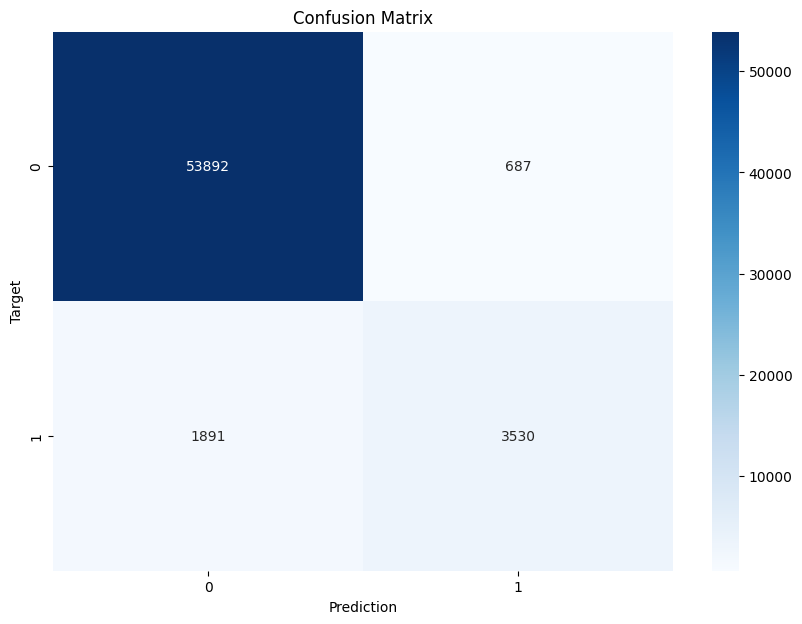

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel("Target")
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

- Seaborn(sns)
- fmt = 'd': 샘플들에 해당되는 숫자의 Form에 쓸 데이터 타입을 d로 (정수)로 하겠다
- Blues: 개수가 많을수록 짙은 파랑색
- 결과 해석 : 데이터가 치우쳐져 있어서 왼쪽 위가 너무 파랗다

### 정밀도와 재현율
- 재현도: (분모) 실제 양성의 샘플 전체 개수
- 정밀도: (분모) 양성으로 예

5로 따지자면 분류기는 정밀도로 따지면 4개 중에 3개만 진짜 5였으니까 3/4

재현율로 따지면 3/

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_train_5, y_train_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



### 정밀도/재현율 트레이드오프
-> 둘다 높이기는 어렵다

샘플별 점수를 매김
- 임곗값보다 크거나 낮으면 음성 이런식으로 분류
- 임곗값을 높이면 재현율이 낮아지고 정밀도가 올라감

그림 설명
- 임곗값을 기준으로 오른쪽은 5이고, 왼쪽은 5가 아니다 이렇게 예측하는 과정
- 실제로는 5가 여섯개인데 오른쪽에는 4개, 즉 재현율은 4/6
- 임곗값을 높이면 정밀도는 3개중에 3개가 예측
- 높이니까 3/6이 되어 재현율은 떨어짐

낮춘 경우
- 5라고 인식한 샘플이 많아졌다
- 5개가 다 5라고 인식 - 재현율 100퍼센트
- 그러나 5라고 인식했는데 5가 아닌 것들이 있어서 8개라고 생각했는데 실제로는 6개 뿐이어서 6/8로 떨어짐

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
# 임곗값을 높여 재현율이 줄어드는 것을 확인
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# 적절한 임곗값 설정
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function") # 예측 결과가 아닌 결정점수 반환하도록 지정

# 재현율 계산
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

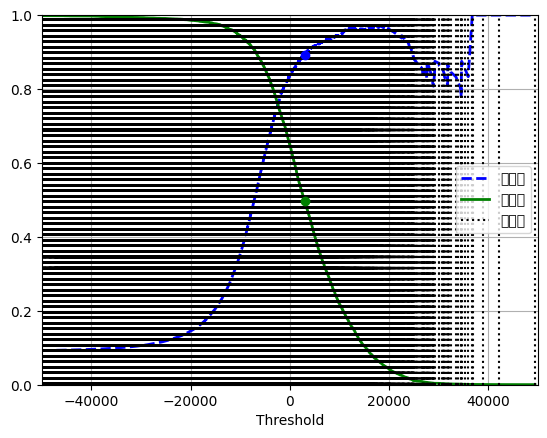

In [ ]:
# 임곗값의 함수로 정밀도와 재현율 시각화
plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", 'dotted', label="임곗값")

# 그리드, 범례, 축, 레이블, 동그라미 추가
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

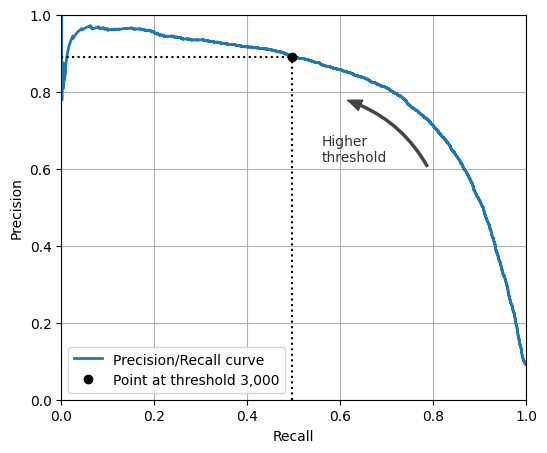

In [ ]:
# 재현율에 대한 정밀도 곡선을 그려 정밀도 및 재현율 트레이드 오프 선택
import matplotlib.patches as patches # 구부러진 화살표를 그리기 위해서
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",

label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
              (0.79, 0.60), (0.61, 0.78),
              connectionstyle="arc3,rad=.2",
              arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
              color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [ ]:
# 정밀도가 최소 90%가 되는 가장 낮은 임곗값 찾기
idx_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### ROC 곡선

In [ ]:
# 수신기 조작 특성 곡선도
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

거짓 양성 비율과 진짜 양성비율의 곡선

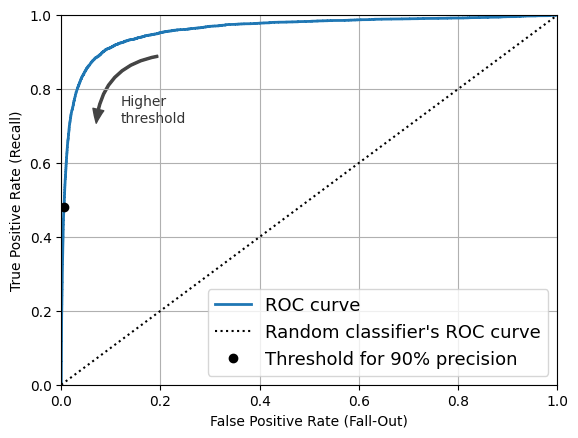

In [ ]:
# matplot을 사용해 TPR에 대한 FPR 곡선 구현
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
                    (0.20, 0.89), (0.07, 0.70),
                    connectionstyle="arc3,rad=.4",
                    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
                    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

- 좌측 상단에 가까울수록 좋은 분류기라 봄
- 직선에 가까운 형태를 띠면 좋은 성능을 갖지 않음

In [ ]:
# 곡선 아래 면적 측정 - "좌측 상단에 가깝다"라는 것을 면적으로 이야기
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5

In [ ]:
# 동일하게 Roc 그리고
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=5,
                                    method="predict_proba") # 교차검증으로 훈련
## 훈련세트에 있는 처음 두개의 이미지에 대한 클래스 확률 확인
y_probas_forest[:2]

array([[0.14, 0.86],
       [0.99, 0.01]])

분류기의 종류에 따라 뽑을 수 있는 것이 달라짐

In [ ]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

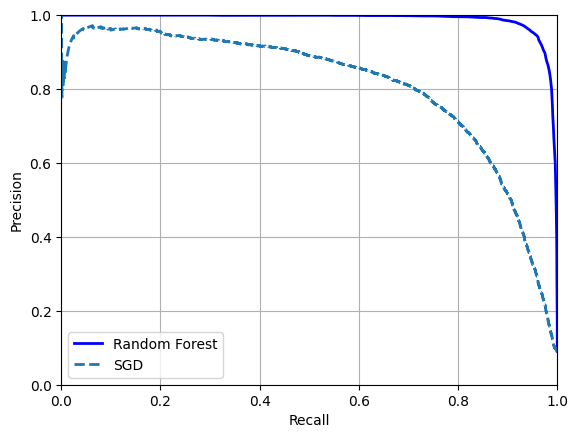

In [ ]:
# PR 곡선을 그려서 서로 비교
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

우측 상단에 가까울수록 좋은 성능을 나타냄

In [ ]:
# 점수로 비교
y_train_pred_forest = y_probas_forest[:,1] >= 0.5 # 양성클래스확률>= 0.5

In [ ]:
# F1
f1_score(y_train_5, y_train_pred_forest)

0.9314961399394116

In [ ]:
# ROC AUC
roc_auc_score(y_train_5, y_train_pred_forest)

0.9391653846037241

## 다중분류
둘 이상의 클래스를 구별할 때 표현

ovo
- 10개 중에 2개를 뽑아 쌍을 만드는 경우의 수를 계산 => 45개의 이진 분류기
- 0과 1을 분류기로 나눠져 학습하는 속도는 훨씬 빠름 => SVM 는 이것을 선호

그러나 대부분 ovr을 선호한다

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
# 이미지에 대한 예측 만들기
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
# 클래스 아이디 추출
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
# 분류기가 훈련될 때 classes_ 속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train)
sdg_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
# SGD 분류기가 각 클래스에 부여한 점수를 확인
sdg_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
# 모델 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# 입력의 스케일 조정 -> 정확도 향상 가능
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### 오류분석
- 모델의 성능 향상을 위한 방법 - 생성된 오류의 종류를 분석
- 오차 행렬을 관찰
  - cross_val_predict() 함수를 사용해 예측을 만들고 confusion_matrix() 함수를 호출

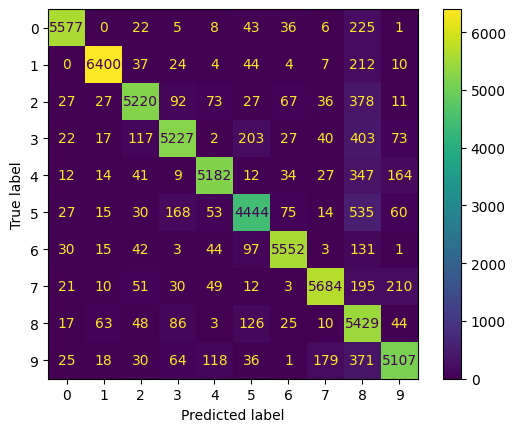

In [ ]:
# 오차 행렬을 컬러 그래프로 시각화 분석
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

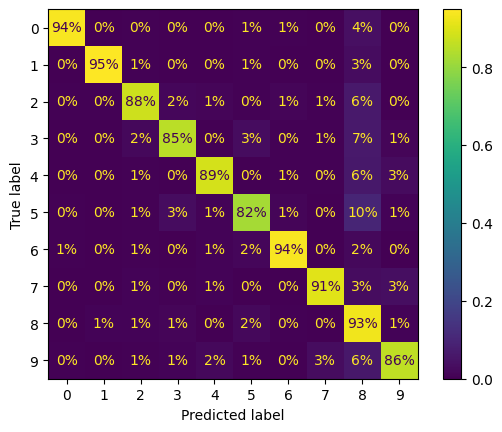

In [ ]:
# 오차행렬 정규화 -> 숫자가 커서 작게 보는 것이 더 좋음
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%") # 소숫점없이 백분율 표시
plt.show()

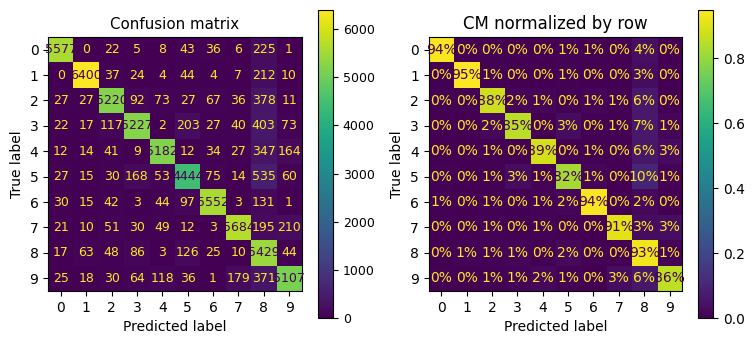

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")

axs[1].set_title("CM normalized by row")
plt.show()

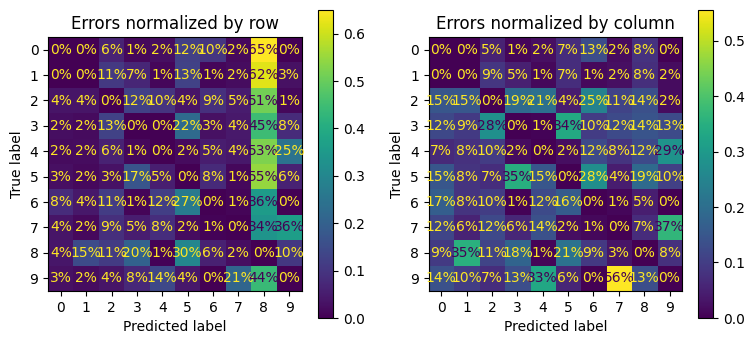

In [ ]:
# 오류를 더 눈에 띄게 만들기 위해 올바른 예측에 대한 가중치를 0으로 설정
sample_weight = (y_train_pred != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")

axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")

axs[1].set_title("Errors normalized by column")
plt.show()

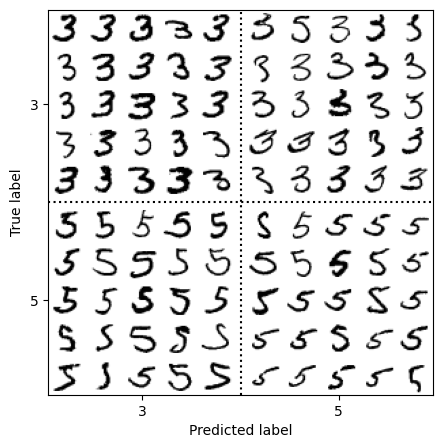

In [ ]:
# 오차행렬을 분석하면 분류기의 성능 향상 방안에 관한 인사이트 얻음
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),(X_aa, (0, 1)), (X_ab, (1, 1))]:
  for idx, image_data in enumerate(images[:size*size]):
    x = idx % size + label_col * (size + pad)
    y = idx // size + label_row * (size + pad)
    plt.imshow(image_data.reshape(28, 28), cmap="binary",
               extent=(x, x + 1, y, y + 1))

plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

3과 5의 오류를 줄이기 위해 이미지를 **중앙에 위치**시키고 **회전되어 있지 않도록** 전처리  

=> 변형이미지로 훈련집합을 보강하는게 더 좋은 방법이라 봄

=> 이것이 바로 **data Augmentation**

## 다중 레이블 분류

#### multilabel classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8')%2 == 1) # 홀수 true, 짝수 false => 이진분류기
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
# 예측을 만들면 레이블 두개 출력
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# 다중 분류기 평가
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

### ClassifierChain

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [ ]:
np.random.seed(42) # 동일하게 재현되도록 하기 위해 지정
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

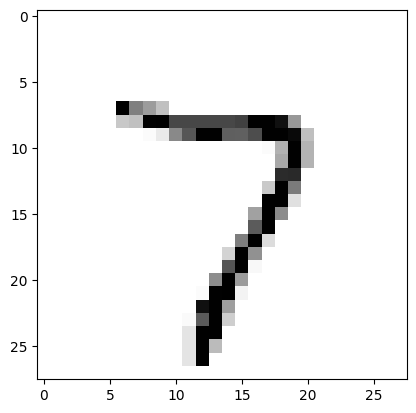

In [ ]:
# 분류기를 훈련시켜 이미지를 깨끗하게 만들기
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()